프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
==============================================

루브릭 조건
--------


|평가문항|상세기준|
|------|---|
|1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|
|2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|
|3. 시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|

모듈 가져오기
----------

In [655]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

(1) 데이터 가져오기
---------------

* ### sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* ### diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [656]:
#데이터 확인
data = load_diabetes()

print(data.feature_names)
print(type(data))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
<class 'sklearn.utils.Bunch'>


In [657]:
#데이터 분리 저장
df_X = data.data
df_y = data.target

#데이터 확인
print(df_X)
print(df_y)

#컬럼 수 조정
df_X = df_X[:, :9]


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

(4) train 데이터와 test 데이터로 분리하기
----------------------------------

* ### X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [658]:

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=999)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 9) (309,)
(133, 9) (133,)


(5) 모델 준비하기
--------------

* ### 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
* ### 모델 함수를 구현해주세요.

In [659]:
#가중치와 W와 b 준비
W = np.random.rand(9)
b = np.random.rand()
print(W)
print(b)

[0.20384625 0.59774278 0.81306397 0.61371471 0.20461373 0.84079241
 0.37250707 0.66140885 0.97685247]
0.10056025600817808


In [660]:
#모델 함수 구현
def model(X, w, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    y = w * X + b
    return predictions

(6) 손실함수 loss 정의하기
---------------------

* ### 손실함수를 MSE 함수로 정의해주세요.

In [661]:
#손실함수 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기
-----------------------------------

* ### 기울기를 계산하는 gradient 함수를 구현해주세요.

In [662]:
#gradient함수 구현
def gradient(X, W, b, y):
    
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

In [663]:
#구현 확인
dW, db = gradient(X_train, W, b, y_train)

print("dW:", dW)
print("db:", db)

dW: [-2.09956433 -1.06059998 -4.37799713 -3.81773636 -1.76299621 -1.48744717
  3.76833928 -4.37812263 -4.93108281]
db: -313.7462233267993


(8) 하이퍼 파라미터인 학습률 설정하기
-----------------------------

* ### 학습률, learning rate 를 설정해주세요
* ### 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [664]:
LEARNING_RATE = 0.9

Iteration 10 : Loss 5807.0746
Iteration 20 : Loss 5086.2028
Iteration 30 : Loss 4741.0932
Iteration 40 : Loss 4473.3338
Iteration 50 : Loss 4261.9031
Iteration 60 : Loss 4093.3825
Iteration 70 : Loss 3957.7238
Iteration 80 : Loss 3847.3690
Iteration 90 : Loss 3756.6205
Iteration 100 : Loss 3681.1717
Iteration 110 : Loss 3617.7573
Iteration 120 : Loss 3563.8923
Iteration 130 : Loss 3517.6773
Iteration 140 : Loss 3477.6529
Iteration 150 : Loss 3442.6916
Iteration 160 : Loss 3411.9162
Iteration 170 : Loss 3384.6391
Iteration 180 : Loss 3360.3168
Iteration 190 : Loss 3338.5158
Iteration 200 : Loss 3318.8869
Iteration 210 : Loss 3301.1461
Iteration 220 : Loss 3285.0595
Iteration 230 : Loss 3270.4330
Iteration 240 : Loss 3257.1031
Iteration 250 : Loss 3244.9314
Iteration 260 : Loss 3233.7991
Iteration 270 : Loss 3223.6032
Iteration 280 : Loss 3214.2543
Iteration 290 : Loss 3205.6735
Iteration 300 : Loss 3197.7910
Iteration 310 : Loss 3190.5448
Iteration 320 : Loss 3183.8794
Iteration 330 : L

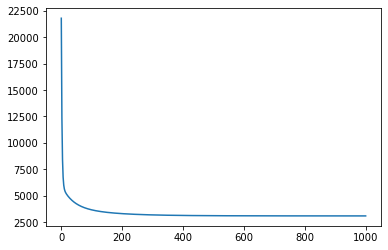

In [665]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

(9) 모델 학습하기
--------------

* ### 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* ### loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* ### 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


Iteration 10 : Loss 3102.7357
Iteration 20 : Loss 3102.6655
Iteration 30 : Loss 3102.5973
Iteration 40 : Loss 3102.5311
Iteration 50 : Loss 3102.4667
Iteration 60 : Loss 3102.4039
Iteration 70 : Loss 3102.3427
Iteration 80 : Loss 3102.2829
Iteration 90 : Loss 3102.2245
Iteration 100 : Loss 3102.1674
Iteration 110 : Loss 3102.1114
Iteration 120 : Loss 3102.0565
Iteration 130 : Loss 3102.0027
Iteration 140 : Loss 3101.9498
Iteration 150 : Loss 3101.8978
Iteration 160 : Loss 3101.8466
Iteration 170 : Loss 3101.7962
Iteration 180 : Loss 3101.7465
Iteration 190 : Loss 3101.6976
Iteration 200 : Loss 3101.6492
Iteration 210 : Loss 3101.6015
Iteration 220 : Loss 3101.5543
Iteration 230 : Loss 3101.5077
Iteration 240 : Loss 3101.4615
Iteration 250 : Loss 3101.4158
Iteration 260 : Loss 3101.3706
Iteration 270 : Loss 3101.3257
Iteration 280 : Loss 3101.2813
Iteration 290 : Loss 3101.2372
Iteration 300 : Loss 3101.1935
Iteration 310 : Loss 3101.1501
Iteration 320 : Loss 3101.1070
Iteration 330 : L

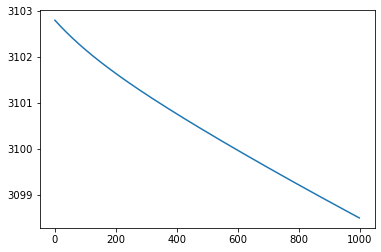

In [666]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

(10) test 데이터에 대한 성능 확인하기
------------------------------

* ### test 데이터에 대한 성능을 확인해주세요.


In [667]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2479.7351701175517

(11) 정답 데이터와 예측한 데이터 시각화하기
---------------------------------

* ### x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

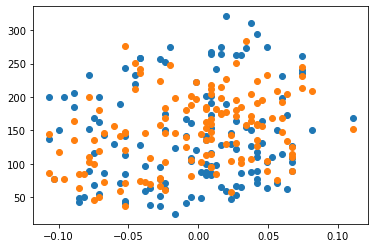

In [668]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
=====================================================

루브릭 조건
--------

|평가문항|상세기준|
|------|---|
|1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|
|2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|
|3. 시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|

모듈 가져오기
----------

In [669]:
import os
from os.path import join

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


(1) 데이터 가져오기
--------------

* ### 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* ### [여기]에서 데이터를 상세히 확인할 수 있습니다.
[여기]: https://www.kaggle.com/c/bike-sharing-demand/data

In [670]:
data_dir = os.getenv('HOME')+'/Aiffel/Exploration/data/'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

#데이터 확인
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
--------------------------------------------------------------------------------

* ### to_datetime 활용 : [링크] 참조
* ### pandas datetime extract year month day 키워드로 검색해 보기
[링크]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

In [671]:
#자료형 변환(to_datetime 활용)
train['datetime'] = pd.to_datetime(train['datetime'])

print(train['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


In [672]:
#컬럼 생성하기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

#컬럼 생성 확인
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
------------------------------------------------------------

* ### sns.countplot 활용해서 시각화하기
* ### subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='year', ylabel='count'>

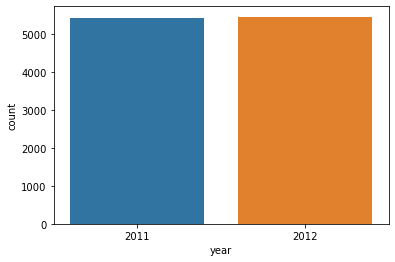

In [673]:
#sns.countplot 활용해서 시각화하기
sns.countplot(x="year", data=train)

<AxesSubplot:xlabel='month', ylabel='count'>

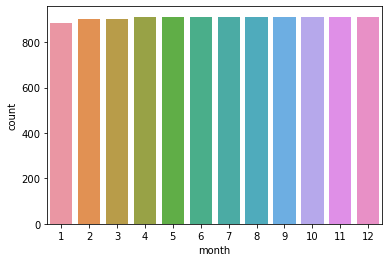

In [674]:
sns.countplot(x="month", data=train)

<AxesSubplot:xlabel='day', ylabel='count'>

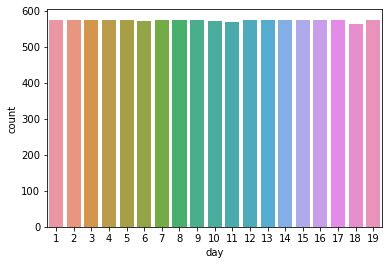

In [675]:
sns.countplot(x="day", data=train)

<AxesSubplot:xlabel='hour', ylabel='count'>

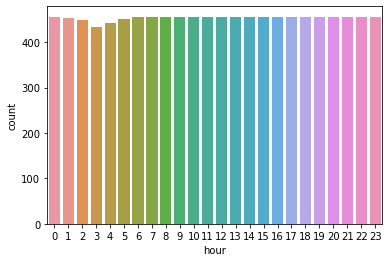

In [676]:
sns.countplot(x="hour", data=train)

<AxesSubplot:xlabel='minute', ylabel='count'>

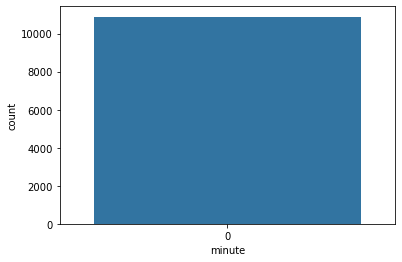

In [677]:
sns.countplot(x="minute", data=train)

<AxesSubplot:xlabel='second', ylabel='count'>

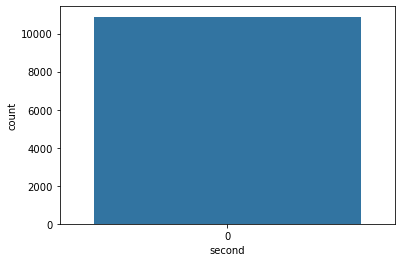

In [678]:
sns.countplot(x="second", data=train)

<AxesSubplot:xlabel='second', ylabel='count'>

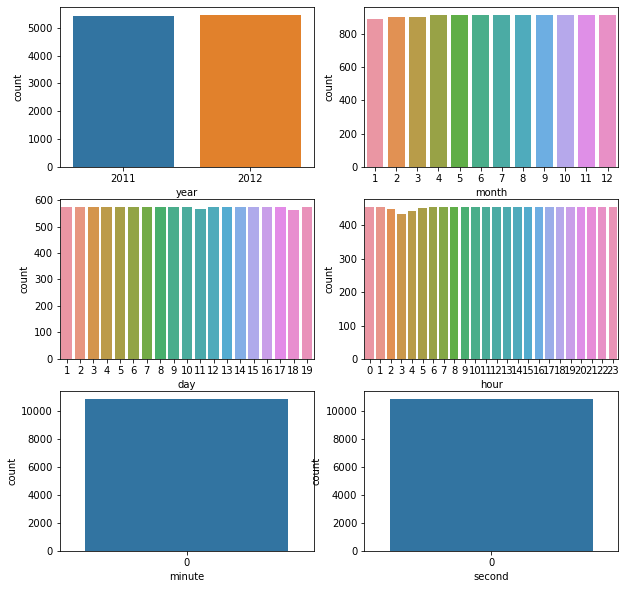

In [679]:
#subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(3, 2, 1) 
sns.countplot(x="year", data=train)

ax2 = fig.add_subplot(3, 2, 2) 
sns.countplot(x="month", data=train)

ax3 = fig.add_subplot(3, 2, 3) 
sns.countplot(x="day", data=train)

ax4 = fig.add_subplot(3, 2, 4) 
sns.countplot(x="hour", data=train)

ax5 = fig.add_subplot(3, 2, 5) 
sns.countplot(x="minute", data=train)

ax6 = fig.add_subplot(3, 2, 6) 
sns.countplot(x="second", data=train)


(4) X, y 컬럼 선택 및 train/test 데이터 분리
--------------------------------------

* ### X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual, registered 컬럼이 필요할까요?

* ### count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [680]:
print(len(train.columns))
print(train.columns)

18
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [681]:
#데이터 컬럼 조정
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']

len(features)

X = train[features]
print(X.shape)
X.head()

(10886, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


In [682]:
#y변수 데이터 넣기
target = ['count']

y = train[target]
print(y.shape)
y.head()

(10886, 1)


,count
0,16
1,40
2,32
3,13
4,1


In [683]:
#train/test 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=621)

(5) LinearRegression 모델 학습
----------------------------

In [684]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
--------------------------------------------------

In [685]:
prediction = model.predict(X_test)
prediction

array([[-69.80767926],
       [221.05016216],
       [386.04288056],
       ...,
       [ 70.69693652],
       [120.48900383],
       [107.07251822]])

In [686]:

rmse = mean_squared_error(y_test, prediction, squared=False)
rmse


139.09080174633453

(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
---------------------------------------------------------

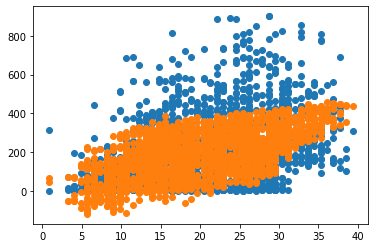

In [687]:
plt.scatter(X_test["temp"], y_test)
plt.scatter(X_test["temp"], prediction)
plt.show()

회고
--

Learning Rate를 줄일 수록 예측 모형이 하나의 직선에 가까워진다는 걸 알았다. 이미 배운 개념일지도 모르지만, 머릿 속에 없었는데 막상 그림으로 변화되니 직관적이고 신기했다.


모델을 많이 돌린다고 해서 비례해서 결과가 좋아지는 것은 아니었다. LEARNING RATE와 Random State로는 변화시킬 수 있는 범위가 한정적이어서 결국 학습 데이터에 손을 댈 수 밖에 없었다. 왜 데이터 전처리가 중요한지, 데이터의 질이 중요하다고 하는지 알 수 있었다.


엉뚱하게도 마지막 그래프를 그리는 데 왜 안 되는지를 몰라서 시간을 많이 잡아먹었다. data frame이라는 인식 없이 코드가 같은데 왜 이 건 또 안되는지 꽤나 헤맸다. 수업을 들을 때 조금 더 집중해서 보고 생각하고 코드를 짜야겠다는 생각을 다시 한 번 했다. 1번 그래프의 역시 단독으로만 추가 실행하면 항상 다시 그려지지 않고 오류가 나와서 왜 그러나 했는데 알고보니 변수명이 같아서 2번을 실행한 뒤에 자료형이 바뀌기 때문이었다..